### 0. 查看数据

In [1]:
# 读取CSV文件
data <- read.csv("2 ANOVA_data_music.csv")
# 显示数据
print(data)

     ID       condition productivity
1     1        no_music     187.6473
2     2        no_music     196.4893
3     3        no_music     194.3215
4     4        no_music     190.1110
5     5        no_music     156.7473
6     6        no_music     145.1821
7     7        no_music     186.4197
8     8        no_music     113.8088
9     9        no_music     213.9845
10   10        no_music     175.9192
11   11        no_music     239.3506
12   12        no_music     129.5284
13   13        no_music     255.5445
14   14        no_music     235.9668
15   15        no_music     161.0509
16   16        no_music     184.0774
17   17        no_music     117.7657
18   18        no_music     128.6113
19   19        no_music     130.6829
20   20        no_music     179.0910
21   21        no_music     113.8830
22   22        no_music     153.4929
23   23        no_music     141.5767
24   24        no_music     210.9246
25   25        no_music     222.2598
26   26        no_music     203.6263
2

### 1. 单因素方差分析

In [2]:
# 进行单因素方差分析
result <- aov(productivity ~ condition, data = data)

# 显示结果
summary(result)

             Df Sum Sq Mean Sq F value   Pr(>F)    
condition     2  24734   12367   9.291 0.000159 ***
Residuals   147 195661    1331                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

一个在线零售商希望提高员工的工作效率，同时改善他们的工作体验。目前，零售商订单管理中心的员工在工作时没有得到任何形式的娱乐，如背景音乐、电视等。零售商想知道提供一些员工要求的播放背景音乐是否会提高生产力，如果能提高，具体能提高多少。

因此，一名研究人员随机抽取了 150 名员工。这 150 名参与者被随机分为三组，每组50 名参与者：（a）一个 “对照组（control group）” 不听音乐；（b） 一个“治疗组（treatment group）”，他们听音乐，但不能选择听什么；和（c）第二个“治疗组”（treatment group），他们不仅可以听音乐，还可以自主选择听什么音乐。

实验持续一个月。在实验结束时，三组的“生产力”是根据“每小时处理的平均包裹数量”来衡量。因此，因变量是“生产力”：由一个月实验期间每小时处理的平均包装数量衡量，而解释变量是“分组”：有三个相互独立的组，“no_music”（对照组）、“music_no_choice”（治疗组 A）和“music_choice”（治疗组 B）。研究人员假设，适当的娱乐放松会提高生产力，处于可选择音乐工作状态下的员工（治疗组 B）的生产力水平最高，其次是不可选择音乐工作状态下（治疗组 A），最后是无音乐组（对照组）。

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  104.7   161.0   185.0   184.9   205.0   285.3 

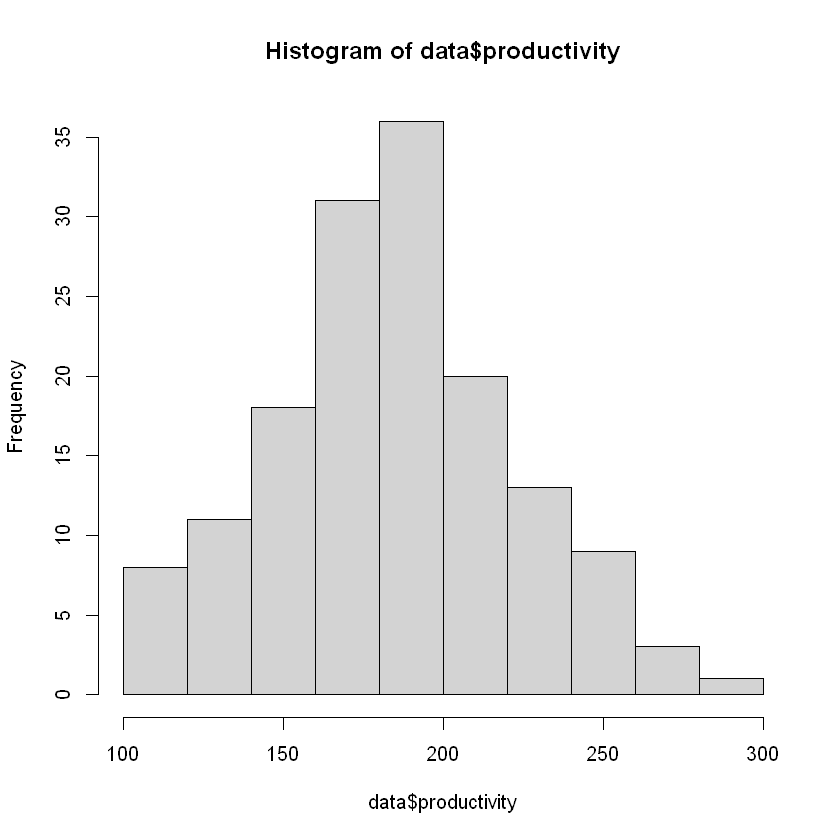

In [3]:
# 基础分析
summary(data$productivity)

# 数据分布分析
hist(data$productivity)

## 数据分析方法和理由

1. **方法选择：单因素方差分析（One-way ANOVA）**  
我们选择了单因素方差分析作为主要的数据分析方法。这是一种用于比较三个或更多组间平均数差异的统计方法。

2. **适用性**  
在这个研究中，我们有三个独立的组：对照组、治疗组A和治疗组B。我们的目标是比较这三个组在生产力上是否存在显著差异。这正是单因素方差分析所擅长的。

3. **假设检验**  
单因素方差分析可以帮助我们检验零假设（即所有组的平均生产力都相等）是否成立。如果P值小于0.05，我们就可以拒绝零假设，认为至少有两个组的平均生产力存在显著差异。

4. **结果解读**  
单因素方差分析的结果可以告诉我们各组间是否存在显著差异，但不能告诉我们哪些组之间存在显著差异。如果我们发现各组间存在显著差异，我们可能需要进行事后检验（如Tukey HSD）来确定哪些组之间存在显著差异。

5. **实施步骤**  
在R中，我们可以使用`aov`函数进行单因素方差分析，然后使用`summary`函数查看结果。具体代码如下：



In [ ]:
# 进行单因素方差分析
result <- aov(productivity ~ condition, data = data)

# 显示结果
summary(result)

             Df Sum Sq Mean Sq F value   Pr(>F)    
condition     2  24734   12367   9.291 0.000159 ***
Residuals   147 195661    1331                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

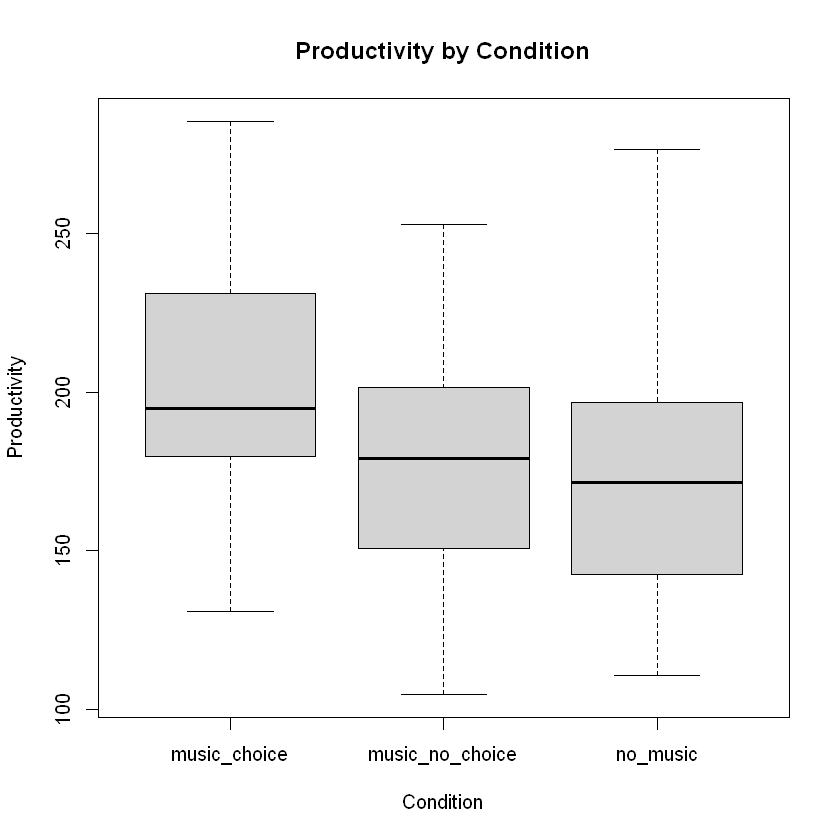

In [4]:
# ANOVA分析
result <- aov(productivity ~ condition, data = data)

# 查看ANOVA结果
summary(result)

# 创建箱线图
boxplot(productivity ~ condition, data = data, main = "Productivity by Condition", xlab = "Condition", ylab = "Productivity")

## 研究问题和假设

本研究旨在探讨背景音乐是否能提高在线零售商的员工生产力，以及员工是否能选择音乐是否会对生产力产生影响。具体来说，我们关注以下两个研究问题：

1. 听背景音乐的员工是否比不听音乐的员工生产力更高？
2. 能选择听什么音乐的员工是否比不能选择的员工生产力更高？

基于这些研究问题，我们提出以下假设：

1. 听背景音乐的员工的生产力会高于不听音乐的员工。
2. 能选择听什么音乐的员工的生产力会高于不能选择的员工。

我们将通过实证研究来检验这些假设。

这个问题可以使用单因素方差分析（One-way ANOVA）来解决。因为你的目标是比较三个独立的组（对照组、治疗组A、治疗组B）在生产力上是否存在显著差异。单因素方差分析是用于比较三个或更多组间平均数差异的统计方法，适合你的情况。

以下是使用R进行单因素方差分析的代码：



In [ ]:
# 读取数据
data <- read.csv("your_file.csv")

# 进行单因素方差分析
result <- aov(productivity ~ condition, data = data)

# 显示结果
summary(result)



请将"your_file.csv"替换为你的CSV文件的实际路径和名称。